# VGGNet
* 3x3 필터만 사용함
* 단순하고 반복적인 구조로 모델의 깊이가 증가함
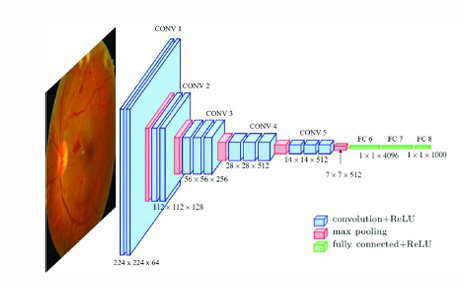

# ResNet
* Residual Learning 도입
* 학습할함수를직접예측하는게아니라잔차(residual)를학습
* 매우 깊은 궂 (152 layers 이상)도 안정적으로 학습이 가능하여 이후 모든 모델의 표준 설계의 요소가 됨


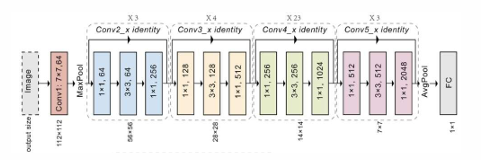

## Residual Block 의 동작방식
$F(x) + x$ 형태의 스킵연결

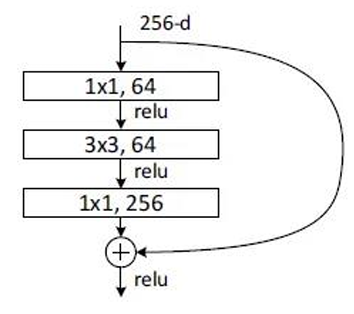

https://colab.research.google.com/drive/1_GImt5eBdb8wJQPDPBJ_NI60fmrZI5dM?usp=sharing

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [2]:
# 데이터로드및전처리
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # 정규화
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)  # 원-핫인코딩

In [3]:
# ---------------------------------
# (1) 일반CNN 모델정의(Baseline)
# ---------------------------------
def build_cnn():
    model = models.Sequential(
        [
            layers.Input(shape=(32, 32, 3)),
            layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
            layers.MaxPooling2D((2, 2)),
            layers.Flatten(),
            layers.Dense(128, activation="relu"),
            layers.Dense(10, activation="softmax"),
        ]
    )
    model.compile(
        optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model

In [4]:
# ---------------------------------
# (2) VGG16 모델(Pretrained 사용)
# ---------------------------------
def build_vgg16():
    base_model = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
    base_model.trainable = False  # 기존가중치동결(Fine-tuning 가능)

    model = models.Sequential(
        [
            base_model,
            layers.Flatten(),
            layers.Dense(256, activation="relu"),
            layers.Dense(10, activation="softmax"),
        ]
    )
    model.compile(
        optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model

In [5]:
# ---------------------------------
# (3) ResNet50 모델(Pretrained 사용)
# ---------------------------------
def build_resnet50():
    base_model = ResNet50(
        weights="imagenet", include_top=False, input_shape=(32, 32, 3)
    )
    base_model.trainable = False  # 기존가중치동결
    model = models.Sequential(
        [
            base_model,
            layers.GlobalAveragePooling2D(),
            layers.Dense(256, activation="relu"),
            layers.Dense(10, activation="softmax"),
        ]
    )
    model.compile(
        optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model

In [9]:
# ---------------------------------
# 모델학습및평가
# ---------------------------------
def train_and_evaluate(model, name, epochs=10):
    print(f"\nTraining {name}...")
    model.fit(
        x_train,
        y_train,
        epochs=epochs,
        batch_size=128,
        validation_data=(x_test, y_test),
        verbose=2,
    )
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"{name} Test Accuracy: {test_acc:.4f}")
    return test_acc

In [10]:
# ---------------------------------
# 실행
# ---------------------------------
cnn_model = build_cnn()
vgg16_model = build_vgg16()
resnet50_model = build_resnet50()
cnn_acc = train_and_evaluate(cnn_model, "CNN")
vgg16_acc = train_and_evaluate(vgg16_model, "VGG16")
resnet50_acc = train_and_evaluate(resnet50_model, "ResNet50")
# 최종결과출력
print("\nFinal Accuracy Comparison:")
print(f"CNN Accuracy: {cnn_acc:.4f}")
print(f"VGG16 Accuracy: {vgg16_acc:.4f}")
print(f"ResNet50 Accuracy: {resnet50_acc:.4f}")


Training CNN...
Epoch 1/10
391/391 - 13s - 32ms/step - accuracy: 0.4408 - loss: 1.5533 - val_accuracy: 0.5598 - val_loss: 1.2433
Epoch 2/10
391/391 - 9s - 24ms/step - accuracy: 0.6004 - loss: 1.1350 - val_accuracy: 0.6164 - val_loss: 1.0697
Epoch 3/10
391/391 - 10s - 26ms/step - accuracy: 0.6648 - loss: 0.9595 - val_accuracy: 0.6488 - val_loss: 1.0044
Epoch 4/10
391/391 - 16s - 41ms/step - accuracy: 0.7044 - loss: 0.8515 - val_accuracy: 0.6961 - val_loss: 0.8702
Epoch 5/10
391/391 - 17s - 43ms/step - accuracy: 0.7380 - loss: 0.7597 - val_accuracy: 0.7145 - val_loss: 0.8347
Epoch 6/10
391/391 - 16s - 41ms/step - accuracy: 0.7575 - loss: 0.6976 - val_accuracy: 0.7178 - val_loss: 0.8209
Epoch 7/10
391/391 - 16s - 41ms/step - accuracy: 0.7838 - loss: 0.6275 - val_accuracy: 0.7368 - val_loss: 0.7664
Epoch 8/10
391/391 - 17s - 44ms/step - accuracy: 0.7989 - loss: 0.5754 - val_accuracy: 0.7397 - val_loss: 0.7789
Epoch 9/10
391/391 - 22s - 57ms/step - accuracy: 0.8193 - loss: 0.5177 - val_acc